### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
# 宣告
import cv2
import numpy as np
import os
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.layers.core import Activation
from keras.layers import BatchNormalization, Conv2D, Dense, Input, MaxPooling2D
from keras.models import Model, Sequential

Using TensorFlow backend.


--2020-03-04 18:41:08--  https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/data/dog.jpg [following]
--2020-03-04 18:41:10--  https://github.com/pjreddie/darknet/raw/master/data/dog.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg [following]
--2020-03-04 18:41:10--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 

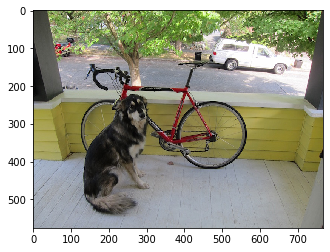

In [2]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O data/dog2.jpg
image=cv2.imread('data/dog2.jpg')
#ax.imshow(image)

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)

In [3]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model = Sequential()
model.add(Conv2D(3, (1,1), padding='same', activation='relu', input_shape=image.shape))
#作業: 接續搭建一個 4 個 3*3 的 filters 
model.add(Conv2D(4, (3,3), padding='same', activation='relu'))

print(model.summary())
#權重都是亂數值

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
# 但我們這裡只需要判讀一張，
# 所以透過 expand_dims() 函式來多擴張一個維度
image_batch = np.expand_dims(image, axis=0)
print(image_batch.shape)

(1, 576, 768, 3)


(576, 768, 4)


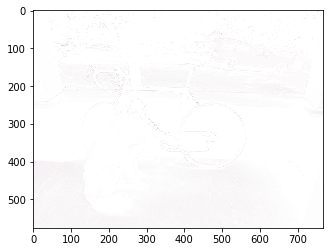

In [5]:
# model.predict() 函式，得到回傳便是 feature map
image_conv = model.predict(image_batch)
img = np.squeeze(image_conv, axis=0)
print(img.shape)
plt.imshow(img.astype(np.uint8))
plt.show()

#### 由於權重都是亂數值，所以每次跑出來的結果不同
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 576, 768, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 576, 768, 32)      128       
_________________________________________________________________
batch_normalization_1 (Batch (None, 576, 768, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 576, 768, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 576, 768, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 576, 768, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 576, 768, 32)      0   

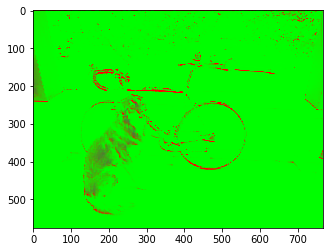

In [6]:
input_tensor = Input(image.shape)
x = input_tensor

x = Conv2D(32, (1,1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(strides=(1, 1), padding='same')(x)
x = Conv2D(32, (5,5), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(1,1), strides=(1, 1), padding='same')(x)
x = Dense(units=32, activation='relu')(x)
x = Dense(image.shape[-1], activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)
print(model.summary())

image_batch = np.expand_dims(image, axis=0)
print(image_batch.shape)

image_conv = model.predict(image_batch)
img = np.squeeze(image_conv, axis=0)
print(img.shape)
plt.imshow(img)
plt.show()